In [2]:
import opendatasets as od

In [3]:
od.download('stackoverflow-developer-survey-2020')

Using downloaded and verified file: .\stackoverflow-developer-survey-2020\survey_results_public.csv
Using downloaded and verified file: .\stackoverflow-developer-survey-2020\survey_results_schema.csv
Using downloaded and verified file: .\stackoverflow-developer-survey-2020\README.txt


In [4]:
import pandas as pd

In [5]:
survey_raw_df = pd.read_csv('stackoverflow-developer-survey-2020/survey_results_public.csv')

In [6]:
survey_raw_df

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,64858,NaN,Yes,NaN,16,NaN,NaN,NaN,United States,NaN,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,NaN,NaN,10,Less than 1 year
64457,64867,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Morocco,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64458,64898,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Viet Nam,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,64925,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Poland,NaN,...,NaN,NaN,NaN,NaN,Angular;Angular.js;React.js,NaN,NaN,NaN,NaN,NaN


In [7]:
survey_raw_df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

In [8]:
schema_fname = 'stackoverflow-developer-survey-2020/survey_results_schema.csv'
schema_raw = pd.read_csv(schema_fname, index_col='Column').QuestionText

In [9]:
schema_raw

Column
Respondent            Randomized respondent ID number (not in order ...
MainBranch            Which of the following options best describes ...
Hobbyist                                        Do you code as a hobby?
Age                   What is your age (in years)? If you prefer not...
Age1stCode            At what age did you write your first line of c...
                                            ...                        
WebframeWorkedWith    Which web frameworks have you done extensive d...
WelcomeChange         Compared to last year, how welcome do you feel...
WorkWeekHrs           On average, how many hours per week do you wor...
YearsCode             Including any education, how many years have y...
YearsCodePro          NOT including education, how many years have y...
Name: QuestionText, Length: 61, dtype: object

While the survey responses contain a wealth of information, we'll limit our analysis to the following areas:

    Demographics of the survey respondents and the global programming community.
    Distribution of programming skills, experience, and preferences.
    Employment-related information, preferences, and opinions.
Let's select a subset of columns with the relevant data for our analysis.

In [10]:
selected_columns = [
    # Demographics
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    'UndergradMajor',
    # Programming experience
    'Hobbyist',
    'Age1stCode',
    'YearsCode',
    'YearsCodePro',
    'LanguageWorkedWith',
    'LanguageDesireNextYear',
    'NEWLearn',
    'NEWStuck',
    # Employment
    'Employment',
    'DevType',
    'WorkWeekHrs',
    'JobSat',
    'JobFactors',
    'NEWOvertime',
    'NEWEdImpt'
]

In [11]:
len(selected_columns)

20

Let's extract a copy of the data from these columns into a new data frame survey_df. We can continue to modify further without affecting the original data frame.

In [12]:
survey_df = survey_raw_df[selected_columns].copy()

In [13]:
schema = schema_raw[selected_columns]

In [14]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Hobbyist                64416 non-null  object 
 6   Age1stCode              57900 non-null  object 
 7   YearsCode               57684 non-null  object 
 8   YearsCodePro            46349 non-null  object 
 9   LanguageWorkedWith      57378 non-null  object 
 10  LanguageDesireNextYear  54113 non-null  object 
 11  NEWLearn                56156 non-null  object 
 12  NEWStuck                54983 non-null  object 
 13  Employment              63854 non-null  object 
 14  DevType                 49370 non-null

Most of the columns are of object datatype and needs to be formatted accordingly.

In [15]:
survey_df['Age1stCode'] = pd.to_numeric(survey_df.Age1stCode, errors='coerce')
survey_df['YearsCode'] = pd.to_numeric(survey_df.YearsCode, errors='coerce')
survey_df['YearsCodePro'] = pd.to_numeric(survey_df.YearsCodePro, errors='coerce')

The above cell of code converts some those columns into numeric data types while ignoring any non-numeric value. The non-numeric are converted to NaN.

In [16]:
survey_df.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45446.000000,57473.000000,56784.000000,44133.000000,41151.000000
mean,30.834111,15.476572,12.782051,8.869667,40.782174
std,9.585392,5.114081,9.490657,7.759961,17.816383
min,1.000000,5.000000,1.000000,1.000000,1.000000
25%,24.000000,12.000000,6.000000,3.000000,40.000000
50%,29.000000,15.000000,10.000000,6.000000,40.000000
75%,35.000000,18.000000,17.000000,12.000000,44.000000
max,279.000000,85.000000,50.000000,50.000000,475.000000


We can see uncommon data in Age column. For example, minimum age is 1 and maximum age is 279. To fix this, we can remove ages less than 10 and more than 100.

In [17]:
survey_df.drop(survey_df[survey_df.Age<10].index, inplace = True)
survey_df.drop(survey_df[survey_df.Age>100].index, inplace = True)

In [18]:
survey_df.drop(survey_df[survey_df.WorkWeekHrs>140].index, inplace = True)

In [19]:
survey_df['Gender'].value_counts()

Gender
Man                                                            45895
Woman                                                           3835
Non-binary, genderqueer, or gender non-conforming                385
Man;Non-binary, genderqueer, or gender non-conforming            121
Woman;Non-binary, genderqueer, or gender non-conforming           92
Woman;Man                                                         73
Woman;Man;Non-binary, genderqueer, or gender non-conforming       25
Name: count, dtype: int64

Apart from first 3 rows rest are contradictory, so we will replace those data with empty values.

In [20]:
import numpy as np

In [21]:
survey_df.where(~(survey_df.Gender.str.contains(';' , na=False)), np.nan,inplace = True)

In [22]:
survey_df['Gender'].value_counts()

Gender
Man                                                  45895
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: count, dtype: int64

In [23]:
survey_df.sample(10)

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
45751,South Korea,33.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","A health science (such as nursing, pharmacy, r...",Yes,14.0,12.0,7.0,C#;C++;SQL,C#;C++;Rust;SQL,Once a year,Call a coworker or friend,Employed full-time,"Developer, back-end;Developer, game or graphics",52.0,Slightly satisfied,"Industry that I’d be working in;Languages, fra...",Never,Not at all important/not necessary
43589,Bangladesh,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Employed full-time,NaN,NaN,NaN,NaN,NaN,Critically important
26590,Lithuania,27.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","A social science (such as anthropology, psycho...",Yes,17.0,3.0,1.0,C#;Dart;HTML/CSS;JavaScript;PHP,SQL;Swift,Once a year,Visit Stack Overflow;Watch help / tutorial videos,Employed full-time,"Developer, front-end;Developer, game or graphi...",40.0,Slightly satisfied,Flex time or a flexible schedule;Remote work o...,Sometimes: 1-2 days per month but less than we...,Not at all important/not necessary
9359,Germany,38.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,12.0,25.0,14.0,Bash/Shell/PowerShell;C#;C++;HTML/CSS;JavaScri...,Bash/Shell/PowerShell;C++,Once a decade,Call a coworker or friend;Visit Stack Overflow...,"Independent contractor, freelancer, or self-em...","Developer, back-end;Developer, desktop or ente...",30.0,Neither satisfied nor dissatisfied,"Flex time or a flexible schedule;Languages, fr...",Never,Very important
19248,United States,54.0,Man,"Other doctoral degree (Ph.D., Ed.D., etc.)","Another engineering discipline (such as civil,...",Yes,15.0,34.0,30.0,C;C++;HTML/CSS;Java;R;SQL;VBA,C;C++;HTML/CSS;Java;R,Once a decade,Call a coworker or friend;Visit Stack Overflow,Employed full-time,"Academic researcher;Developer, embedded applic...",65.0,Very satisfied,Industry that I’d be working in;Specific depar...,Often: 1-2 days per week or more,Critically important
20034,United States,28.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",No,16.0,5.0,3.0,Java;JavaScript;Python,Java;JavaScript;Python,Once a year,Go for a walk or other physical activity,Employed full-time,"Developer, full-stack",35.0,Very satisfied,Industry that I’d be working in;How widely use...,Never,Critically important
60834,Finland,29.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,18.0,11.0,6.0,HTML/CSS;Ruby,HTML/CSS,Once every few years,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Developer, full-stack;DevOps specialist",37.0,Very dissatisfied,"Languages, frameworks, and other technologies ...",Rarely: 1-2 days per year or less,Very important
3047,Colombia,20.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,14.0,7.0,3.0,C++;Go;HTML/CSS;Java;JavaScript;Julia;PHP;Pyth...,Dart;R;Rust,Every few months,Play games;Visit Stack Overflow;Go for a walk ...,Employed full-time,"Developer, back-end;Developer, front-end;Devel...",15.0,Slightly satisfied,Diversity of the company or organization;Flex ...,Often: 1-2 days per week or more,Critically important
51221,United States,NaN,Man,I never completed any formal education,NaN,Yes,8.0,6.0,NaN,C;C++;Python,C;Haskell;Python;Rust,Once a year,Visit Stack Overflow;Panic,Student,NaN,NaN,NaN,NaN,NaN,NaN
64322,Saudi Arabia,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Once every few years,NaN,"Not employed, and not looking for work",NaN,NaN,NaN,NaN,NaN,NaN



## Exploratory Analysis and Visualization


In [24]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## Country

In [25]:
schema.Country

'Where do you live?'

In [26]:
survey_df.Country.nunique()

183

In [27]:
top_countries = survey_df.Country.value_counts().head(15)

In [28]:
top_countries

Country
United States         12371
India                  8364
United Kingdom         3881
Germany                3864
Canada                 2175
France                 1884
Brazil                 1804
Netherlands            1332
Poland                 1259
Australia              1199
Spain                  1157
Italy                  1115
Russian Federation     1085
Sweden                  879
Pakistan                802
Name: count, dtype: int64

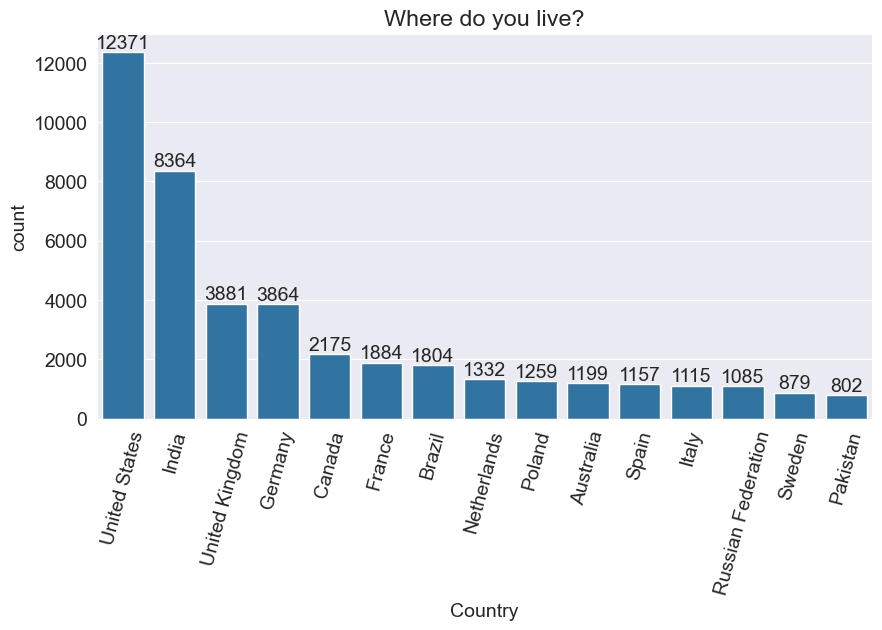

In [29]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=75)
plt.title(schema.Country)
ax=sns.barplot(top_countries)
for bars in ax.containers:
    ax.bar_label(bars)

It appears that a disproportionately high number of respondents are from the US and India, probably because the survey is in English, and these countries have the highest English-speaking populations. We can already see that the survey may not be representative of the global programming community - especially from non-English speaking countries. Programmers from non-English speaking countries are almost certainly underrepresented.

## Age

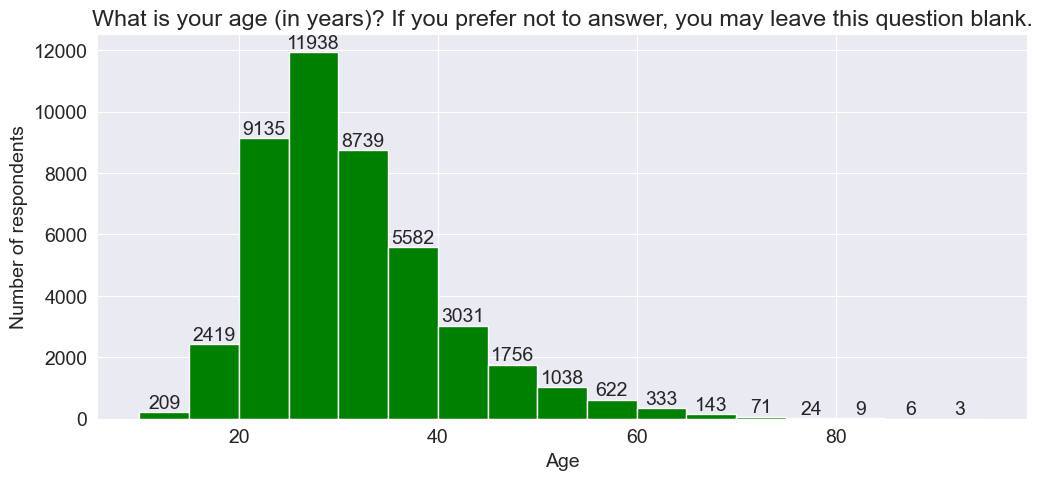

In [30]:
plt.figure(figsize=(12, 5))
plt.title(schema.Age)
plt.xlabel('Age')
plt.ylabel('Number of respondents')

values, bins, bars  = plt.hist(survey_df.Age, bins=np.arange(10,100,5), color='green')
plt.bar_label(bars);

It appears that a large percentage of respondents are 20-45 years old. It's somewhat representative of the programming community in general.

# Gender

In [31]:
gender_counts = survey_df.Gender.value_counts(dropna=False)
gender_counts

Gender
Man                                                  45895
NaN                                                  14191
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: count, dtype: int64

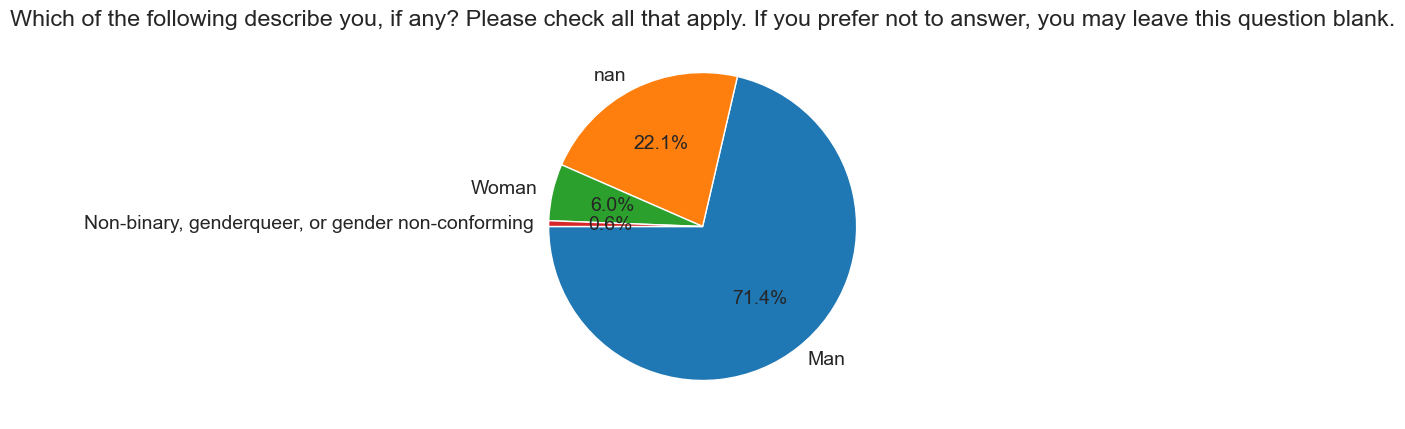

In [32]:
plt.figure(figsize = (12,5))
plt.title(schema.Gender)
plt.pie(gender_counts, labels = gender_counts.index, autopct = '%1.1f%%', startangle=180);

Only 6.6% of survey respondents who have answered the question identify as women or non-binary.

## Education Level

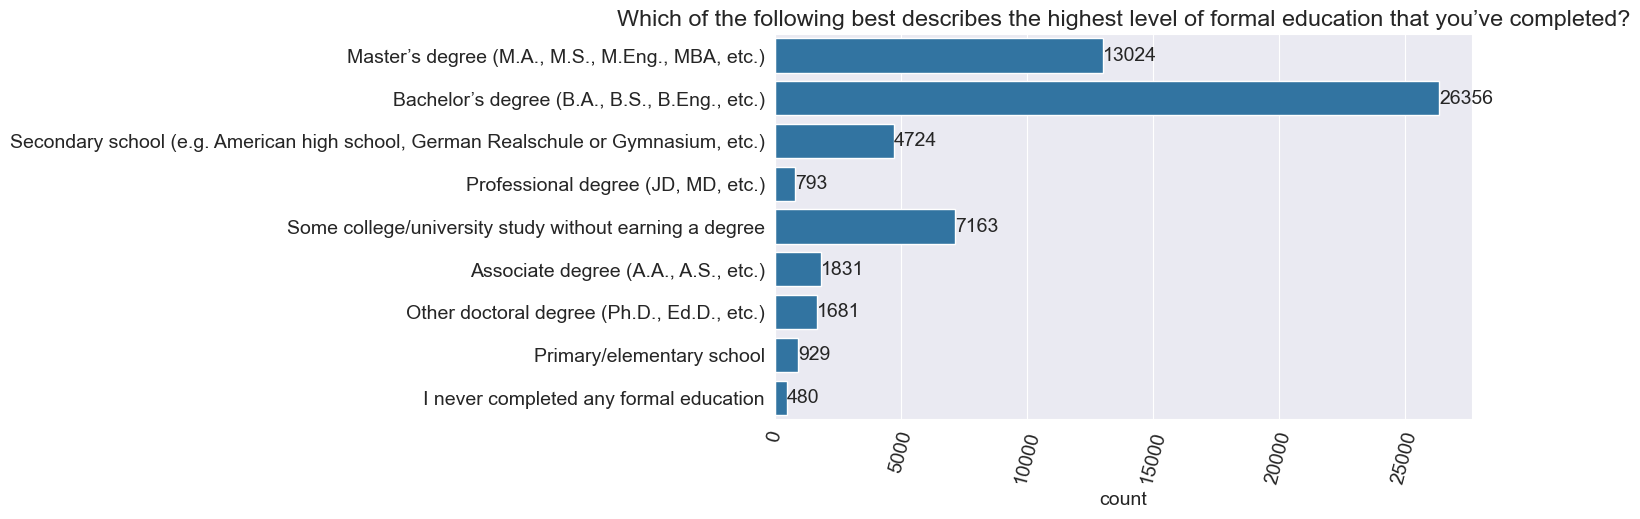

In [62]:
ax=sns.countplot(y=survey_df.EdLevel)
for bars in ax.containers:
    ax.bar_label(bars)
plt.xticks(rotation=75);
plt.title(schema['EdLevel'])
plt.ylabel(None);

It appears that well over half of the respondents hold a bachelor's or master's degree, so most programmers seem to have some college education. However, it's not clear from this graph alone if they hold a degree in computer science.

Let's also plot undergraduate majors, but this time we'll convert the numbers into percentages and sort the values to make it easier to visualize the order.

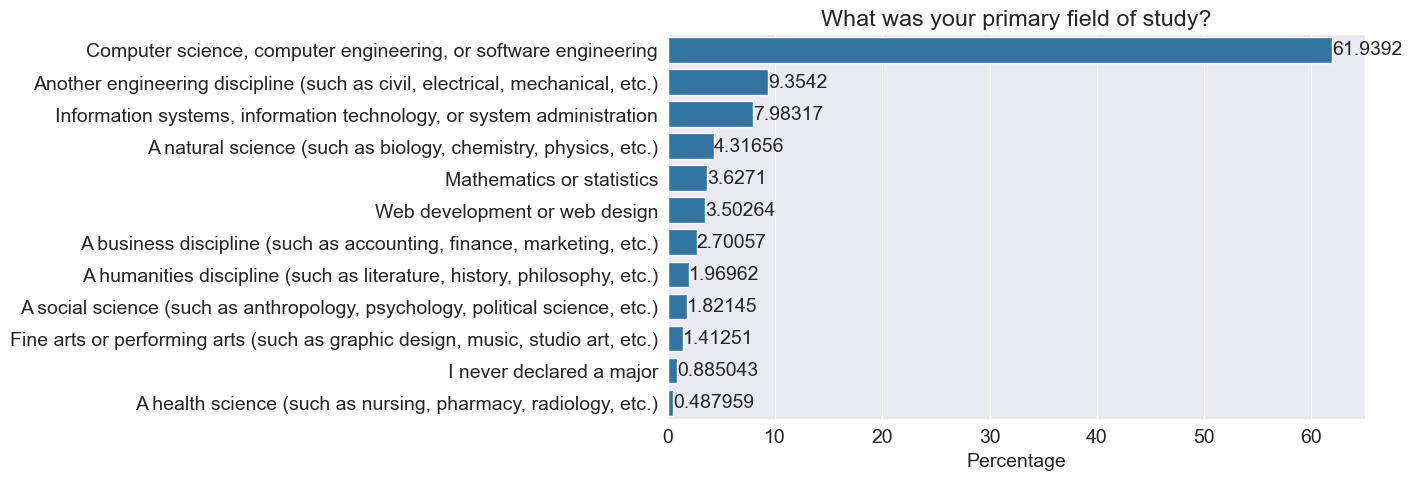

In [34]:
undergrad_pct = survey_df.UndergradMajor.value_counts() * 100 / survey_df.UndergradMajor.count()

ax=sns.barplot(x=undergrad_pct, y=undergrad_pct.index)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title(schema.UndergradMajor)
plt.ylabel(None);
plt.xlabel('Percentage');

It turns out that 40% of programmers holding a college degree have a field of study other than computer science - which is very encouraging. It seems to suggest that while a college education is helpful in general, you do not need to pursue a major in computer science to become a successful programmer.

## Employement

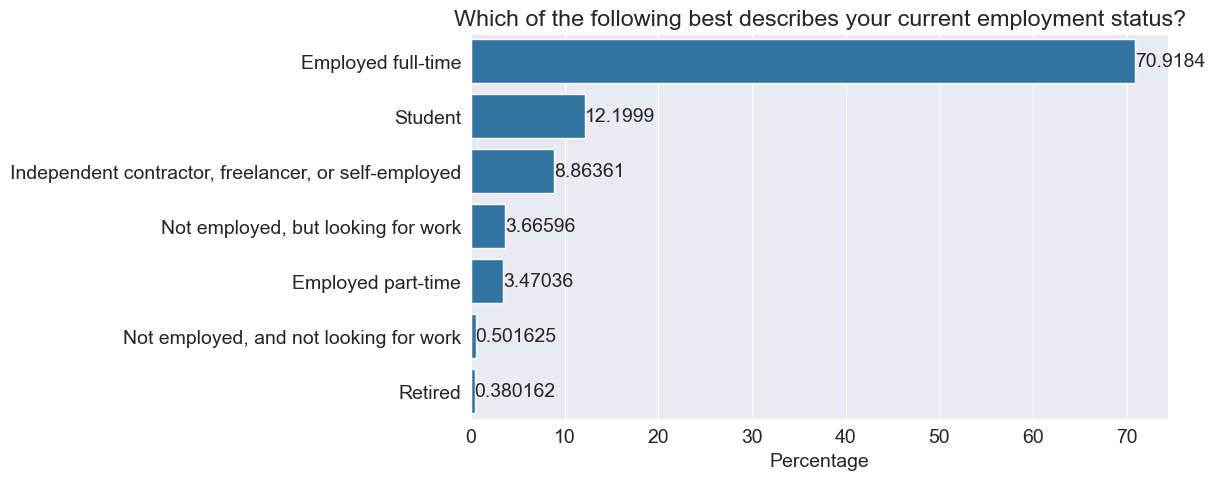

In [84]:
employment_pct = survey_df.Employment.value_counts() * 100 / survey_df.Employment.count()

ax=sns.barplot(x=employment_pct, y=employment_pct.index)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title(schema.Employment)
plt.ylabel(None);
plt.xlabel('Percentage');

It appears that close to 10% of respondents are employed part time or as freelancers.

In [36]:
schema.DevType

'Which of the following describe you? Please select all that apply.'

In [37]:
survey_df.DevType.value_counts()

DevType
Developer, full-stack                                                                                                                                                           4396
Developer, back-end                                                                                                                                                             3056
Developer, back-end;Developer, front-end;Developer, full-stack                                                                                                                  2214
Developer, back-end;Developer, full-stack                                                                                                                                       1465
Developer, front-end                                                                                                                                                            1390
                                                                                       

In [44]:
def split_multicolumn(col_series):
    result_df = col_series.to_frame()
    options = []
    # Iterate over the column
    for idx, value  in col_series[col_series.notnull()].items():
        # Break each value into list of options
        for option in value.split(';'):
            # Add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            # Mark the value in the option column as True
            result_df.at[idx, option] = True
    return result_df[options]

In [45]:
dev_type_df = split_multicolumn(survey_df.DevType)

In [46]:
dev_type_df

,"Developer, desktop or enterprise applications","Developer, full-stack","Developer, mobile",Designer,"Developer, front-end","Developer, back-end","Developer, QA or test",DevOps specialist,"Developer, game or graphics",Database administrator,...,System administrator,Engineering manager,Product manager,Data or business analyst,Academic researcher,Data scientist or machine learning specialist,Scientist,Senior executive/VP,"Engineer, site reliability",Marketing or sales professional
0,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
64457,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [47]:
dev_type_totals = dev_type_df.sum().sort_values(ascending=False)
dev_type_totals

Developer, back-end                              26996
Developer, full-stack                            26915
Developer, front-end                             18128
Developer, desktop or enterprise applications    11687
Developer, mobile                                 9406
DevOps specialist                                 5915
Database administrator                            5658
Designer                                          5262
System administrator                              5185
Developer, embedded applications or devices       4701
Data or business analyst                          3970
Data scientist or machine learning specialist     3939
Developer, QA or test                             3893
Engineer, data                                    3700
Academic researcher                               3502
Educator                                          2895
Developer, game or graphics                       2751
Engineering manager                               2699
Product ma

In [50]:
devtype_df = dev_type_totals.head(10)

In [51]:
devtype_df

Developer, back-end                              26996
Developer, full-stack                            26915
Developer, front-end                             18128
Developer, desktop or enterprise applications    11687
Developer, mobile                                 9406
DevOps specialist                                 5915
Database administrator                            5658
Designer                                          5262
System administrator                              5185
Developer, embedded applications or devices       4701
dtype: int64

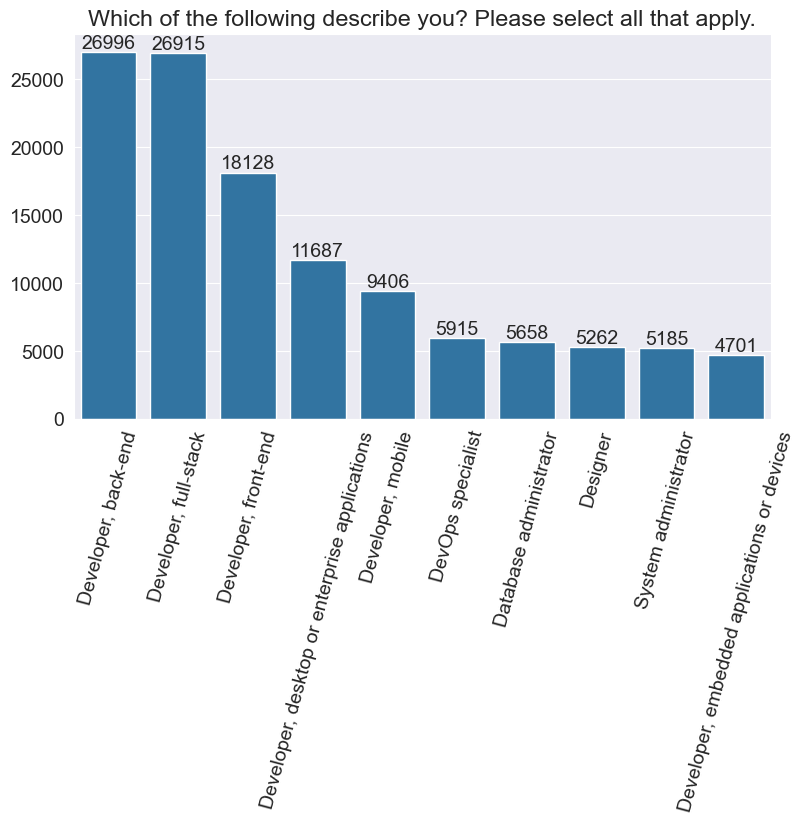

In [65]:
ax=sns.barplot(devtype_df)
for bars in ax.containers:
    ax.bar_label(bars)
plt.xticks(rotation=75);
plt.title(schema['DevType']);

**Q: What are the most popular programming languages in 2020?**

In [66]:
survey_df.LanguageWorkedWith

0                                   C#;HTML/CSS;JavaScript
1                                         JavaScript;Swift
2                                 Objective-C;Python;Swift
3                                                      NaN
4                                        HTML/CSS;Ruby;SQL
                               ...                        
64456                                                  NaN
64457    Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...
64458                                                  NaN
64459                                             HTML/CSS
64460                      C#;HTML/CSS;Java;JavaScript;SQL
Name: LanguageWorkedWith, Length: 64306, dtype: object

In [67]:
language_worked_df = split_multicolumn(survey_df.LanguageWorkedWith)
language_worked_df

,C#,HTML/CSS,JavaScript,Swift,Objective-C,Python,Ruby,SQL,Java,PHP,...,VBA,Perl,Scala,C++,Go,Haskell,Rust,Dart,Julia,Assembly
0,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64457,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [69]:
languages_worked_percentages = language_worked_df.mean().sort_values(ascending=False) * 100
languages_worked_percentages

JavaScript               59.893323
HTML/CSS                 55.801947
SQL                      48.444935
Python                   39.001026
Java                     35.618760
Bash/Shell/PowerShell    29.239884
C#                       27.803004
PHP                      23.130035
TypeScript               22.461357
C++                      21.114670
C                        19.236152
Go                        7.758219
Kotlin                    6.887382
Ruby                      6.229590
Assembly                  5.447392
VBA                       5.394520
Swift                     5.226573
R                         5.064846
Rust                      4.498803
Objective-C               3.603085
Dart                      3.517557
Scala                     3.150561
Perl                      2.757130
Haskell                   1.861413
Julia                     0.782198
dtype: float64

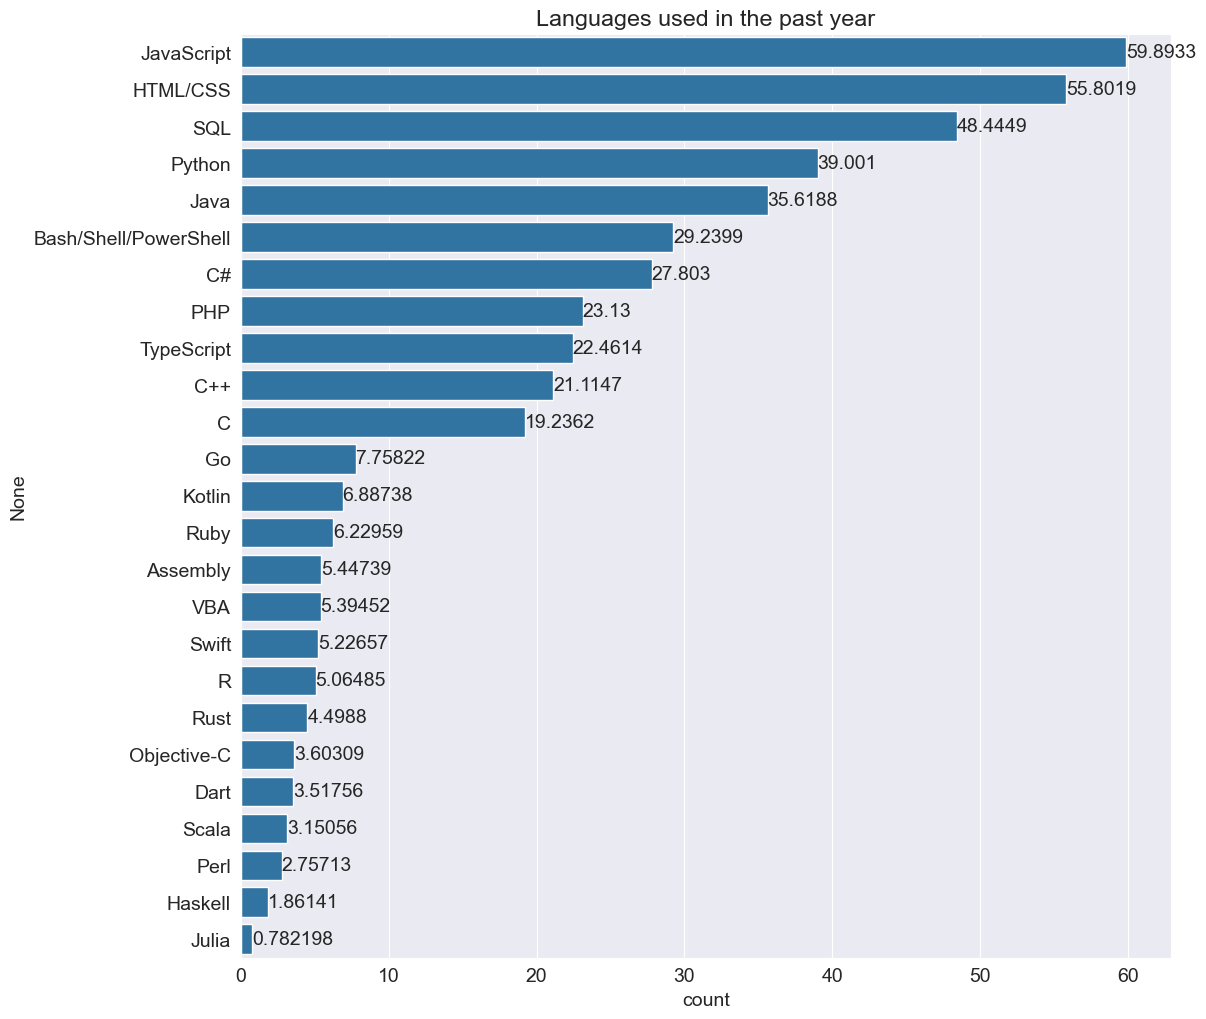

In [71]:
plt.figure(figsize=(12, 12))
ax= sns.barplot(x=languages_worked_percentages, y=languages_worked_percentages.index)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Languages used in the past year");
plt.xlabel('count');

Javascript & HTML/CSS comes out at the top as web development is one of today's most sought skills. It also happens to be one of the easiest to get started. SQL is necessary for working with relational databases, so it's no surprise that most programmers work with SQL regularly. Python seems to be the popular choice for other forms of development, beating out Java, which was the industry standard for server & application development for over two decades.

**Q: Which languages are the most people interested to learn over the next year?**

In [72]:
languages_interested_df = split_multicolumn(survey_df.LanguageDesireNextYear)
languages_interested_percentages = languages_interested_df.mean().sort_values(ascending=False) * 100
languages_interested_percentages

Python                   41.143906
JavaScript               40.425466
HTML/CSS                 32.028116
SQL                      30.799614
TypeScript               26.451653
C#                       21.058688
Java                     20.464653
Go                       19.432090
Bash/Shell/PowerShell    18.057413
Rust                     16.270643
C++                      15.014151
Kotlin                   14.760676
PHP                      10.947657
C                         9.359935
Swift                     8.692812
Dart                      7.308805
R                         6.571704
Ruby                      6.425528
Scala                     5.326097
Haskell                   4.593662
Assembly                  3.766367
Julia                     2.540976
Objective-C               2.338818
Perl                      1.761888
VBA                       1.611047
dtype: float64

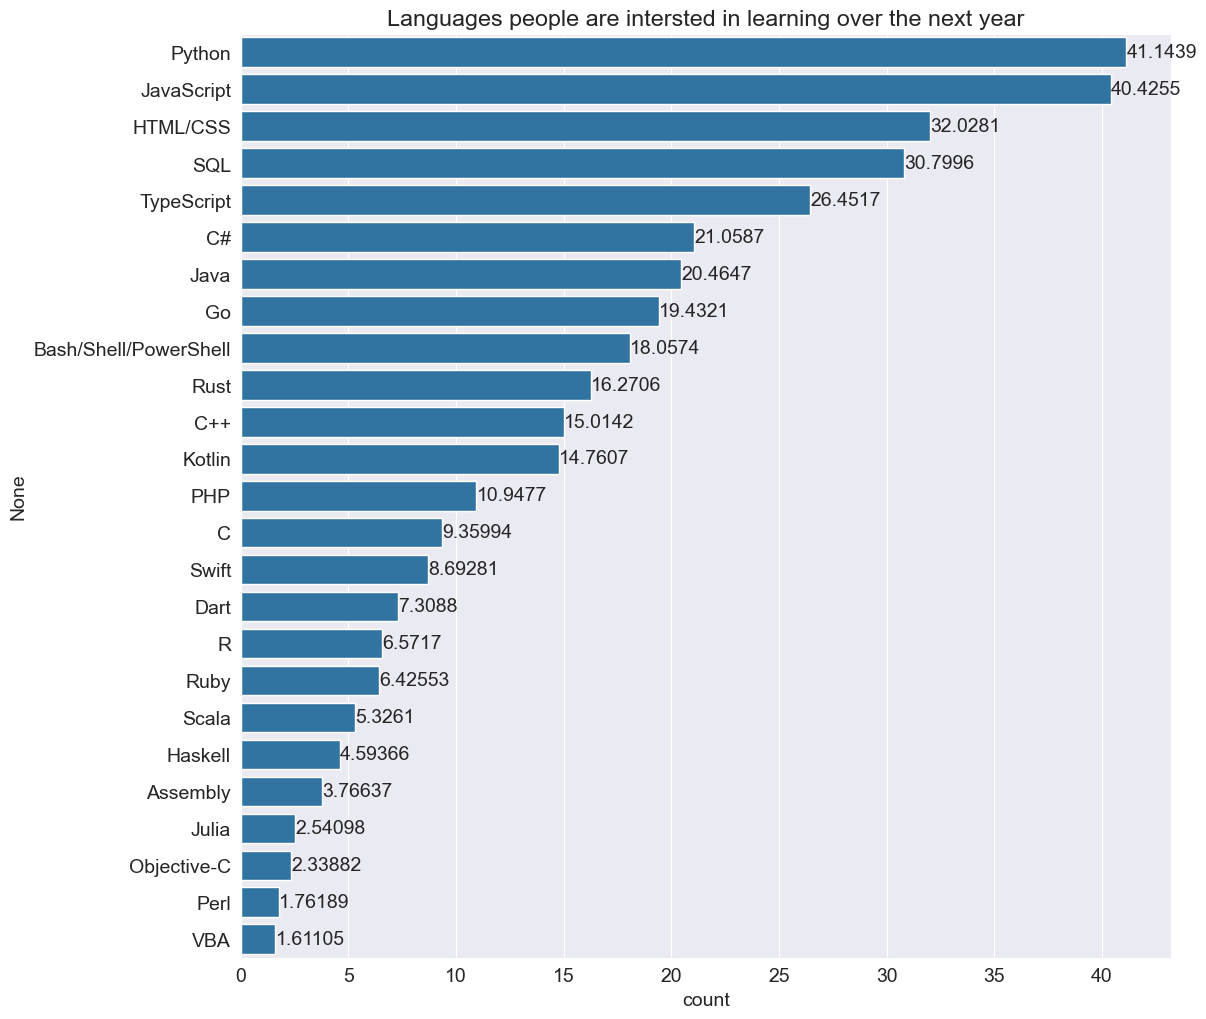

In [73]:
plt.figure(figsize=(12, 12))
ax= sns.barplot(x=languages_interested_percentages, y=languages_interested_percentages.index)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Languages people are intersted in learning over the next year");
plt.xlabel('count');

Python is the language most people are interested in learning - since it is an easy-to-learn general-purpose programming language well suited for a variety of domains: application development, numerical computing, data analysis, machine learning, big data, cloud automation, web scraping, scripting, etc.

**Q: Which are the most loved languages, i.e., a high percentage of people who have used the language want to continue learning & using it over the next year?**

In [75]:
languages_loved_df = language_worked_df & languages_interested_df

In [76]:
languages_loved_percentages = (languages_loved_df.sum() * 100/ language_worked_df.sum()).sort_values(ascending=False)

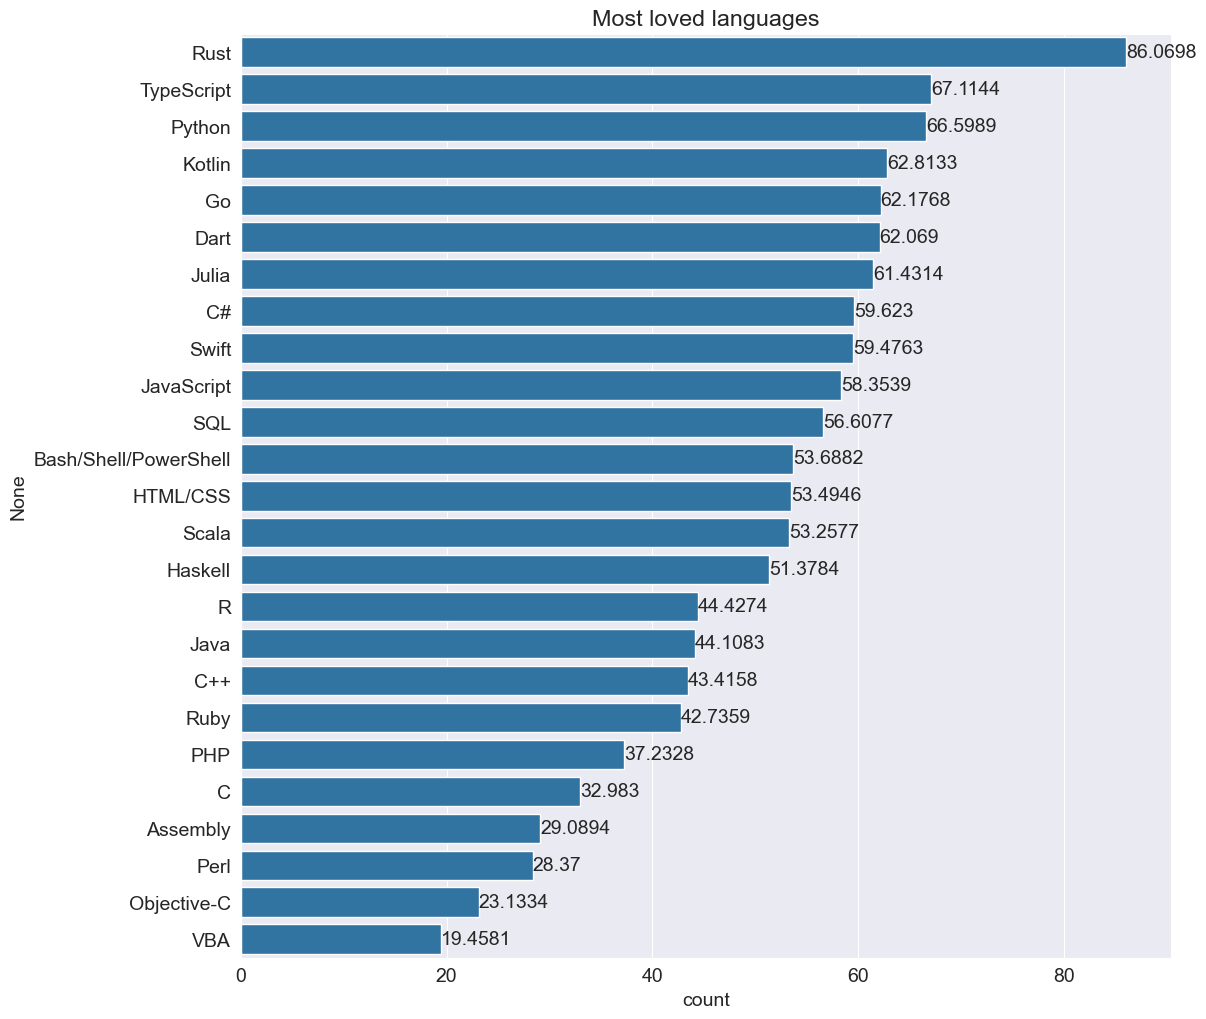

In [77]:
plt.figure(figsize=(12, 12))
ax=sns.barplot(x=languages_loved_percentages, y=languages_loved_percentages.index)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Most loved languages");
plt.xlabel('count');

Rust has been StackOverflow's most-loved language. The second most-loved language is TypeScript, a popular alternative to JavaScript for web development.

**Q: In which countries do developers work the highest number of hours per week? Consider countries with more than 250 responses only.**

In [78]:
countries_df = survey_df.groupby('Country')[['WorkWeekHrs']].mean().sort_values('WorkWeekHrs', ascending=False)

In [79]:
high_response_countries_df = countries_df.loc[survey_df.Country.value_counts() > 250].head(15)

In [80]:
high_response_countries_df

,WorkWeekHrs
Country,
Iran,44.337748
Israel,43.915094
China,42.150000
United States,41.802982
Greece,41.402724
Viet Nam,41.391667
South Africa,41.023460
Turkey,40.982143
Sri Lanka,40.612245


The Asian countries like Iran, China, and Israel have the highest working hours, followed by the United States. However, there isn't too much variation overall, and the average working hours seem to be around 40 hours per week.

**Q: How important is it to start young to build a career in programming?**

In [81]:
schema.YearsCodePro

'NOT including education, how many years have you coded professionally (as a part of your work)?'

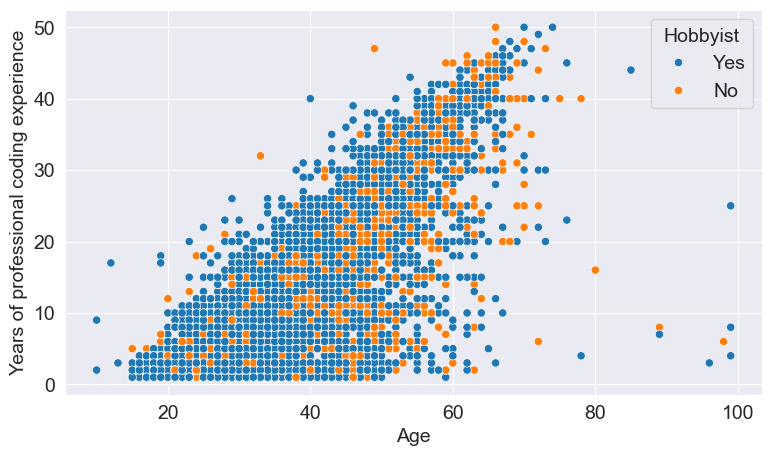

In [82]:
sns.scatterplot(x='Age', y='YearsCodePro', hue='Hobbyist', data=survey_df)
plt.xlabel("Age")
plt.ylabel("Years of professional coding experience");

You can see points all over the graph, which indicates that you can start programming professionally at any age. Many people who have been coding for several decades professionally also seem to enjoy it as a hobby.

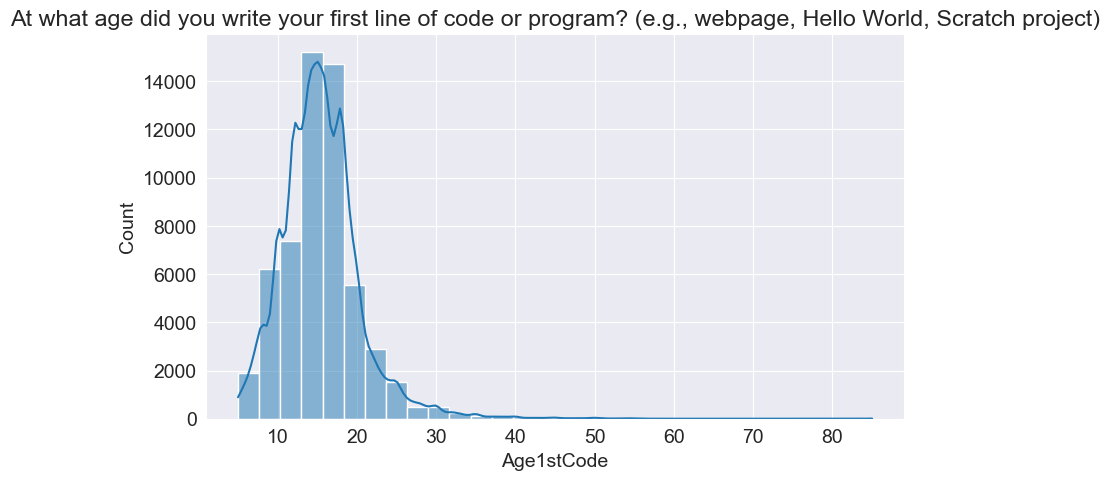

In [83]:
plt.title(schema.Age1stCode)
sns.histplot(x=survey_df.Age1stCode, bins=30, kde=True);

As you might expect, most people seem to have had some exposure to programming before the age of 40. However, but there are people of all ages and walks of life learning to code.

## Inferences and Conclusions

We've drawn many inferences from the survey. Here's a summary of a few of them:

- Based on the survey respondents' demographics, we can infer that the survey is somewhat representative of the overall programming community. However, it has fewer responses from programmers in non-English-speaking countries and women & non-binary genders.

- The programming community is not as diverse as it can be. Although things are improving, we should make more efforts to support & encourage underrepresented communities, whether in terms of age, country, race, gender, or otherwise.


- Although most programmers hold a college degree, a reasonably large percentage did not have computer science as their college major. Hence, a computer science degree isn't compulsory for learning to code or building a career in programming.

- A significant percentage of programmers either work part-time or as freelancers, which can be a great way to break into the field, especially when you're just getting started.

- Javascript & HTML/CSS are the most used programming languages in 2020, closely followed by SQL & Python.

- Python is the language most people are interested in learning - since it is an easy-to-learn general-purpose programming language well suited for various domains.

- Rust and TypeScript are the most "loved" languages in 2020, both of which have small but fast-growing communities. Python is a close third, despite already being a widely used language.

- Programmers worldwide seem to be working for around 40 hours a week on average, with slight variations by country.

- You can learn and start programming professionally at any age. You're likely to have a long and fulfilling career if you also enjoy programming as a hobby.